# 1 Ermittlung der Kennlinie des Abstandssensors dar.

In [1]:
!pip install numpy
import numpy as np

Converterfunktion um "," durch "." zu ersetzen

In [2]:
def conv(x):
    return x.replace(',','.').encode()

Mit der Numpy-Funktion genfromtxt()) Daten aus den Dateien einlesen.
Von den Daten werden die ersten 1000 Werte übersprungen und aus den darauffolgenden 100 Werten der Mittelwert und die Standardabweichung berechnet.

In [3]:
i = 10
x_points = []
data_mean = []
data_std = []
while i <= 70:
    x_points = np.append(x_points, i)
    temp_data = np.genfromtxt((conv(x) for x in open('Distanz_' + str(i) + '_cm.csv')), skip_header=1003, max_rows=100, delimiter=';')
    temp_data = temp_data[:,1]
    data_mean = np.append(data_mean, np.mean(temp_data))
    data_std = np.append(data_std, np.std(temp_data))
    i += 3
print(data_mean)
print(data_std)

[1.4395762  1.26809456 1.12550468 1.0574713  0.95790017 0.87496002
 0.8022669  0.77291004 0.74075728 0.71792416 0.67179194 0.62985356
 0.60795241 0.59723482 0.56554805 0.55110262 0.55483047 0.52407573
 0.53106544 0.5147561  0.48586523]
[0.01545481 0.01930305 0.0194599  0.02135434 0.02578167 0.01930309
 0.02039703 0.02291855 0.01680122 0.02291855 0.02299894 0.02419519
 0.01527824 0.01790244 0.01616897 0.01983022 0.01333553 0.02017757
 0.02282831 0.01378391 0.02815626]


In [4]:
!pip install matplotlib
import matplotlib
import matplotlib.pyplot as plt

Graphische Darstellung der Übertragungsfunktion bzw. Kennlinie der gemessenen Daten

<function matplotlib.pyplot.show(close=None, block=None)>

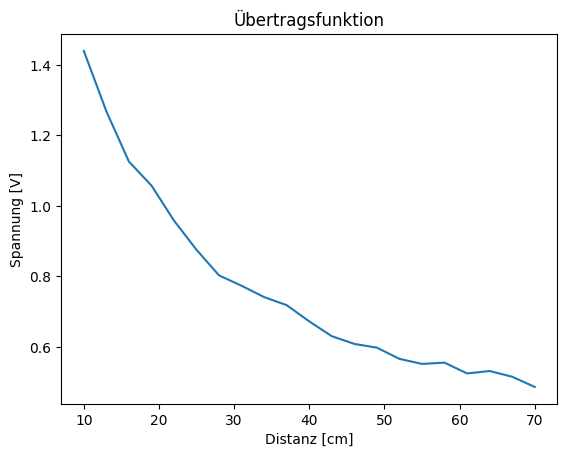

In [5]:
plt.plot(x_points, data_mean)

plt.xlabel('Distanz [cm]')
plt.ylabel('Spannung [V]')
plt.title('Übertragsfunktion');

plt.show

# 2 Modellierung der Kennlinie durch lineare Regression

Graphischer Zusammenhang der Logarithmierten Eingangs- und Ausgangswerte.

<function matplotlib.pyplot.show(close=None, block=None)>

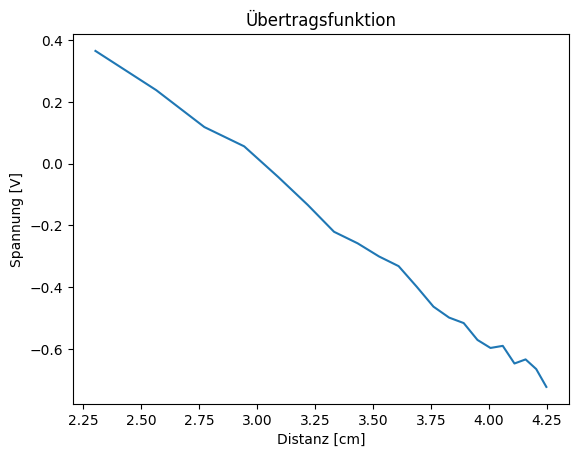

In [6]:
plt.plot(np.log(x_points), np.log(data_mean))

plt.xlabel('Distanz [cm]')
plt.ylabel('Spannung [V]')
plt.title('Übertragsfunktion');

plt.show

Funktion zur Rückrechnung auf den ursprünglichen Zusammenhang über die Umkehrung
der doppelten Logarithmierunen.

In [7]:
import math
def y_func(a, b, x):
    y = np.exp(b) * np.power(np.mean(x),a)
    return y

Berechnung der Ausgleichsgerade mithilfe der linearen Regression.

In [8]:
x_pointslog = np.log(x_points)
data_meanlog = np.log(data_mean)
x_mean = np.mean(np.log(x_points))
y_mean = np.mean(np.log(data_mean))
temp1 = 0
temp2 = 0
for i in range(0,20):
    temp1 += (data_meanlog[i] - y_mean) * (x_pointslog[i] - x_mean)
    temp2 += (data_meanlog[i] - y_mean) * (data_meanlog[i] - y_mean)
a = temp1 / temp2
b = x_mean - a * y_mean
print("a=",a," b=",b)

a= -1.771920378635405  b= 2.9836286203183526


# 3 Flächenmessung mit Fehlerrechnung
Einlesen der Daten für die Messung des DINA4 Blatt

In [9]:
temp_data = np.genfromtxt((conv(x) for x in open('Blatt kurz.csv')), skip_header=1003, max_rows=100, delimiter=';')
temp_data = temp_data[:,1]
page_short_mean = np.mean(temp_data)
page_short_std = np.std(temp_data)

temp_data = np.genfromtxt((conv(x) for x in open('Blatt lang.csv')), skip_header=1003, max_rows=100, delimiter=';')
temp_data = temp_data[:,1]
page_long_mean = np.mean(temp_data)
page_long_std = np.std(temp_data)

print(page_short_mean)
print(page_short_std)
print(page_long_mean)
print(page_long_std)

0.9779404760000001
0.00804858481561971
0.7920153000000001
0.0161420899882512


Größenberechnung DINA4 Blatt

In [10]:
print(y_func(a,b,page_short_mean))
print(y_func(a,b,page_long_mean))

20.556021515234743
29.86823052334288


Standardabweichung für den Mittelwert

In [11]:
page_short_std_mean = page_short_std / math.sqrt(100)
page_long_std_mean = page_long_std / math.sqrt(100)
print(page_short_std_mean)
print(page_long_std_mean)

0.000804858481561971
0.00161420899882512


## Messergebnisse Spannungen:

### Messfehler:

In [12]:
print("Kurze Seite (P=68,26%): ", page_short_mean, " +- ", page_short_std_mean * 1)
print("Kurze Seite (P=95%): ", page_short_mean, " +- ", page_short_std_mean * 1.98)
print("Lange Seite (P=68,26%): ", page_long_mean, " +- ", page_long_std_mean * 1)
print("Lange Seite (P=95%): ", page_long_mean, " +- ", page_long_std_mean * 1.98)

Kurze Seite (P=68,26%):  0.9779404760000001  +-  0.000804858481561971
Kurze Seite (P=95%):  0.9779404760000001  +-  0.0015936197934927024
Lange Seite (P=68,26%):  0.7920153000000001  +-  0.00161420899882512
Lange Seite (P=95%):  0.7920153000000001  +-  0.0031961338176737376


### Fehlerfortpflanzung Abstandsmessung

In [16]:
# d/dx(f(x)) = a*exp(b)*power(x,a-1)
# Delta y = d/dx(f(x)) * Delta x
y_short = a*np.exp(b)*np.power(page_short_mean,a-1) * (2 * page_short_std_mean) * -1
y_long = a*np.exp(b)*np.power(page_long_mean,a-1) * (2 * page_long_std_mean) * -1

In [17]:
print("Kurze Seite (P=68,26%): ", y_func(a,b,page_short_mean), " +- ", y_short)
print("Lange Seite (P=68,26%): ", y_func(a,b,page_long_mean), " +- ", y_long)

Kurze Seite (P=68,26%):  20.556021515234743  +-  0.05995430399310421
Lange Seite (P=68,26%):  29.86823052334288  +-  0.21572967337854324


### Flächenmessung

In [21]:
area_error = math.sqrt((((a*np.exp(2*b)*np.power(page_short_mean,a)*np.power(page_long_mean,a-1))*page_long_std_mean)**2)+(((a*np.exp(2*b)*np.power(page_long_mean,a)*np.power(page_short_mean,a-1))*page_short_std_mean)**2))

In [22]:
print("Fläche (P=68,26%): ", y_func(a,b,page_short_mean) * y_func(a,b,page_long_mean), " +- ", area_error)

Fläche (P=68,26%):  613.9719892598273  +-  2.391228190345222
